In [1]:
import warnings
import logging
import pytorch_lightning as pl

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)

In [6]:
from mappers import *
from model import *
from kernels import *
from dataloaders import *
from plot_callback import PlotLogger

In [7]:
train_loader, test_loader = get_mnist_dataloaders()

In [8]:
plot_callback = PlotLogger(show_plots=True, selected_plots=['neighborhood_dist', 'embeddings', 'probabilities_star', 'cluster_sizes'])

# SNE

Using the same mapper for both views


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

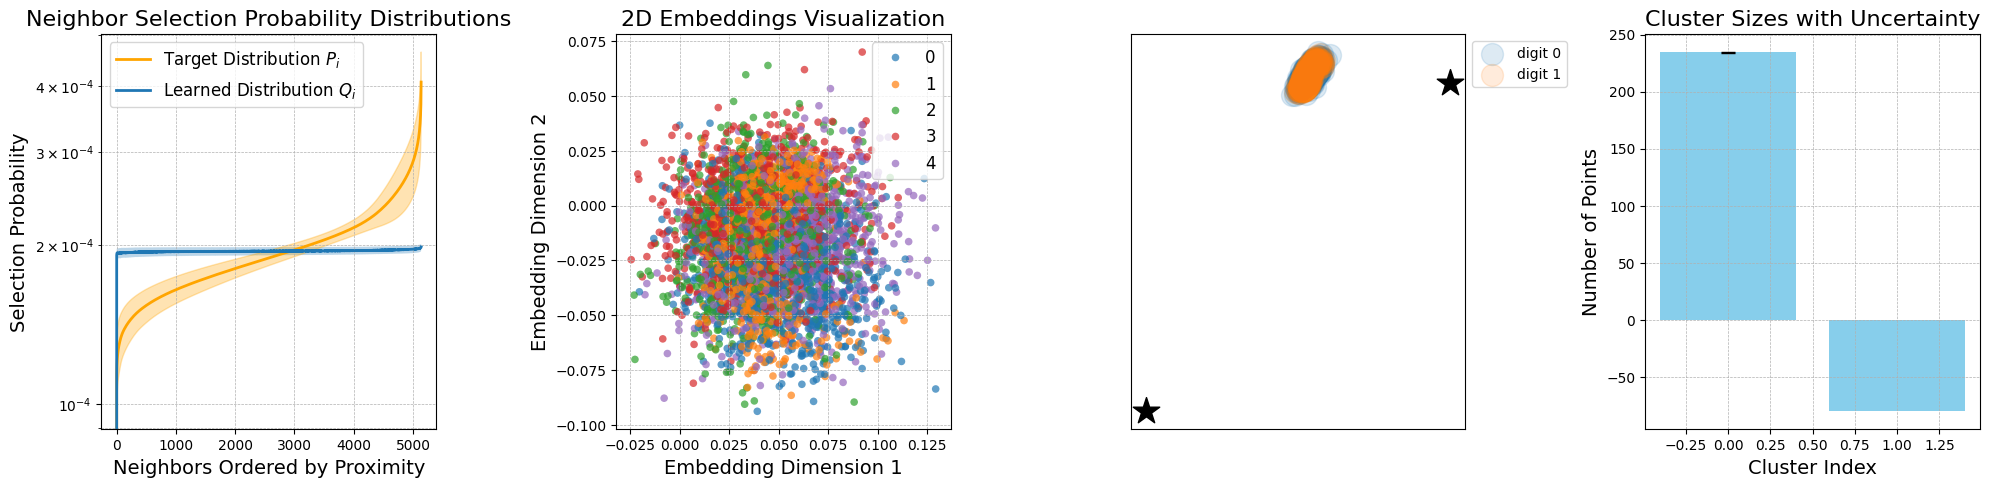

Training: |          | 0/? [00:00<?, ?it/s]

train_loss_epoch: 57.47248363494873
train_loss_epoch: 57.42137956619263
train_loss_epoch: 57.4156551361084
train_loss_epoch: 57.41296100616455
train_loss_epoch: 57.41130971908569
train_loss_epoch: 57.410544872283936
train_loss_epoch: 57.40998554229736
train_loss_epoch: 57.410346031188965
train_loss_epoch: 57.41063213348389


Validation: |          | 0/? [00:00<?, ?it/s]

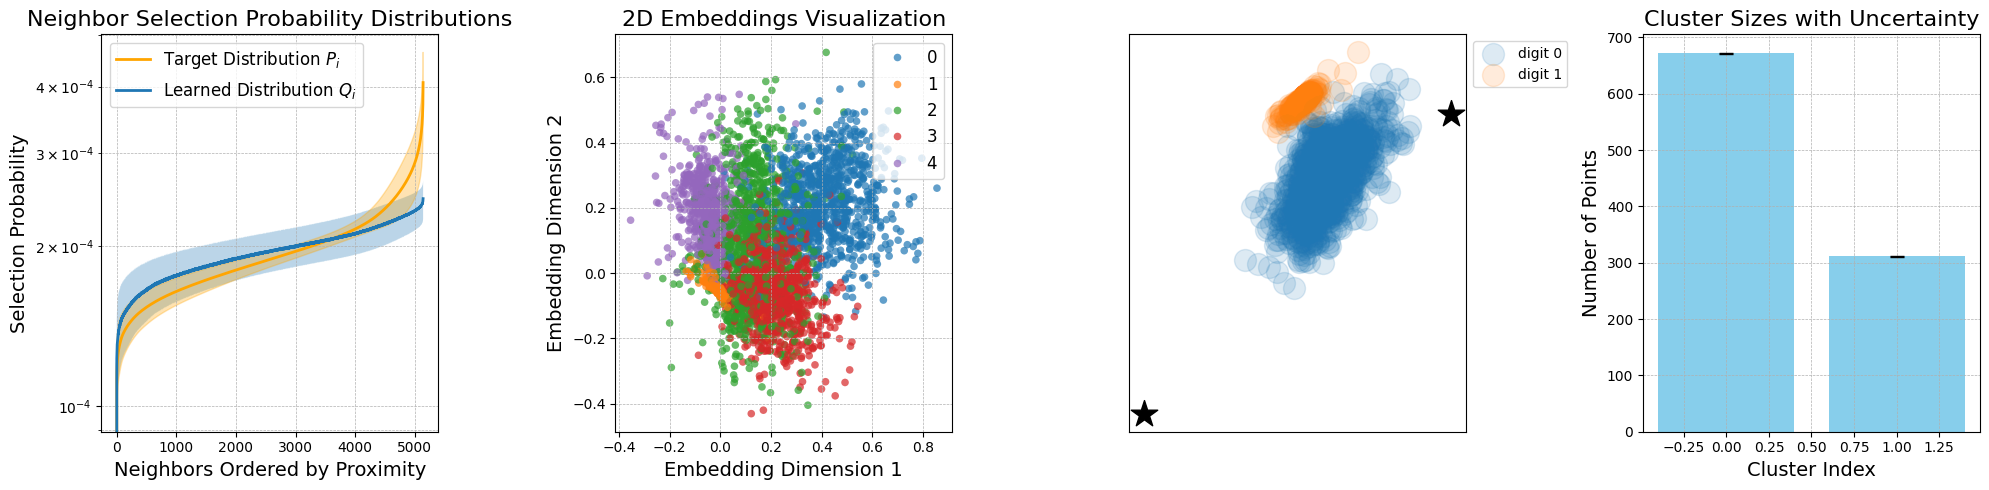

train_loss_epoch: 57.41002655029297
train_loss_epoch: 57.40943431854248
train_loss_epoch: 57.40908861160278
train_loss_epoch: 57.410523414611816
train_loss_epoch: 57.40913534164429
train_loss_epoch: 57.41032266616821
train_loss_epoch: 57.409632205963135
train_loss_epoch: 57.409889698028564


In [ ]:
SNE = KernelModel(
    mapper = MLPMapper(output_dim = 2),
    target_kernel = GaussianKernel(sigma = 5),
    learned_kernel = GaussianKernel(sigma = 1),
    #plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=20, check_val_every_n_epoch=10, callbacks=[plot_callback] ) # gpus=1,
trainer.fit(SNE, train_loader, test_loader)

In [ ]:
trainer

# t-SNE

Sanity Checking: 0it [00:00, ?it/s]

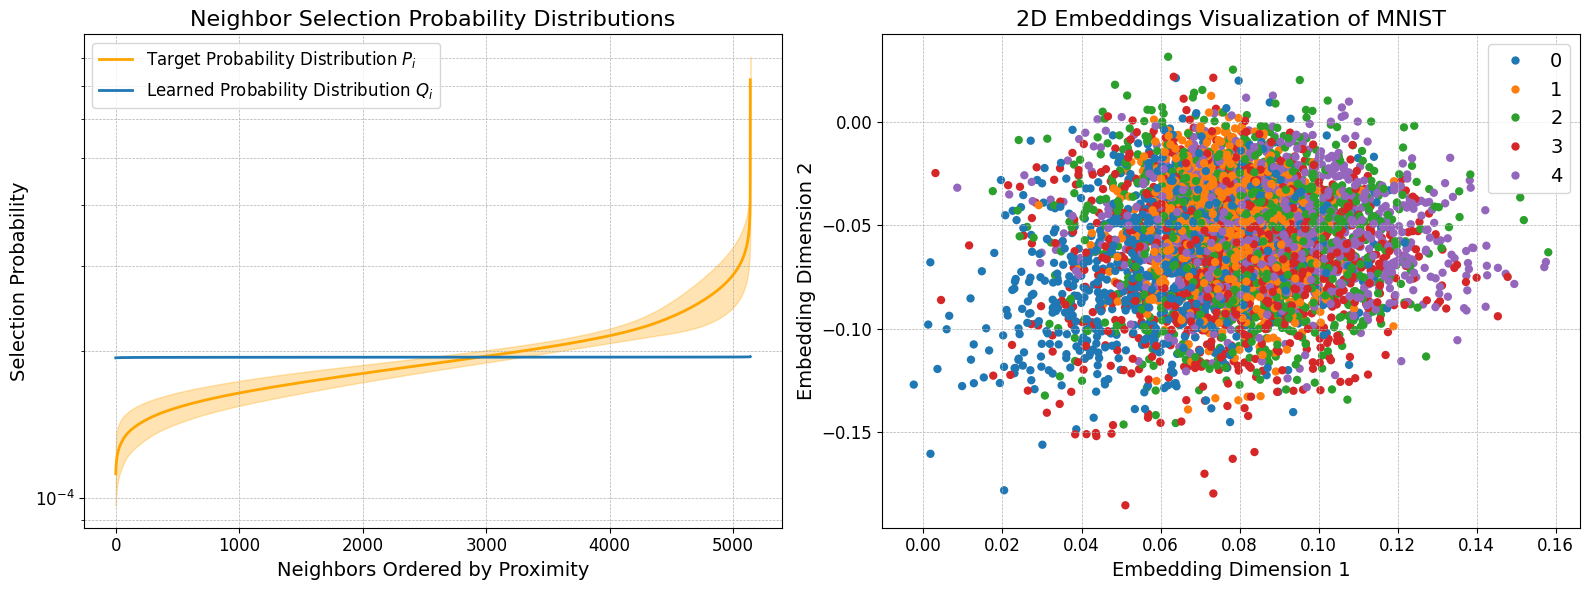

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

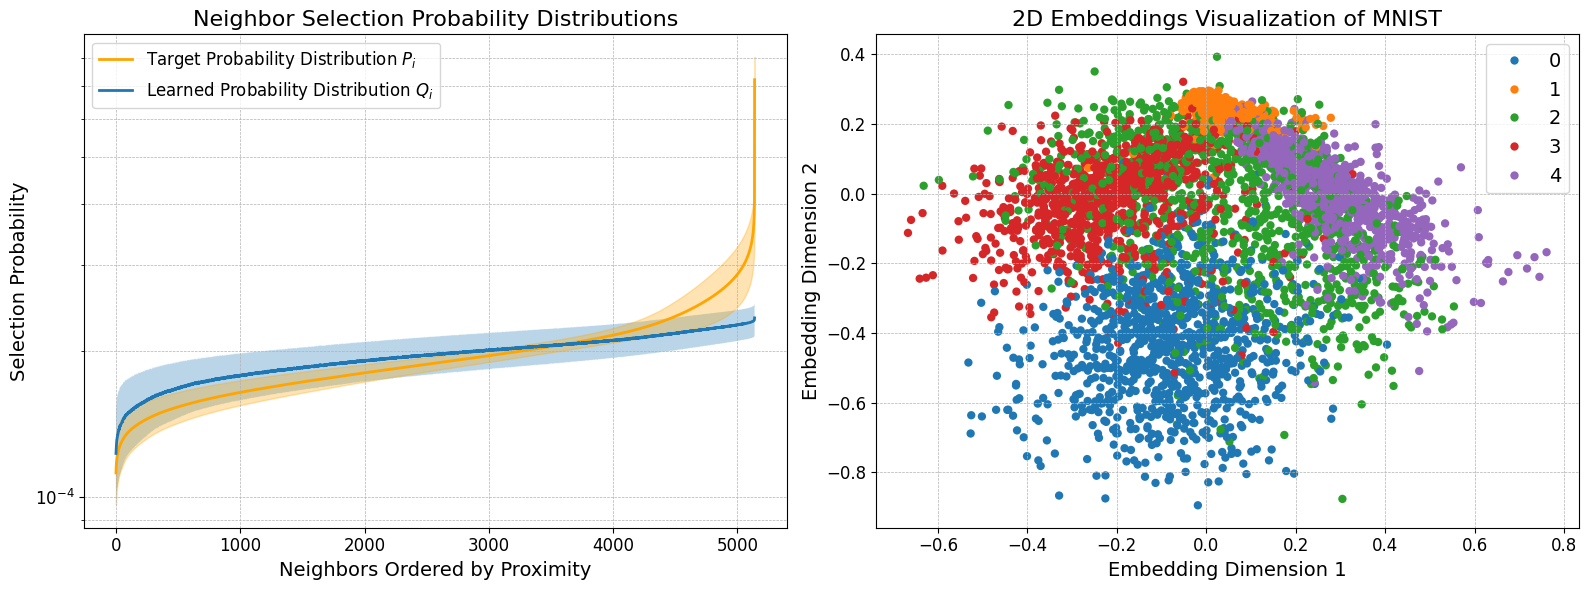

Validation: 0it [00:00, ?it/s]

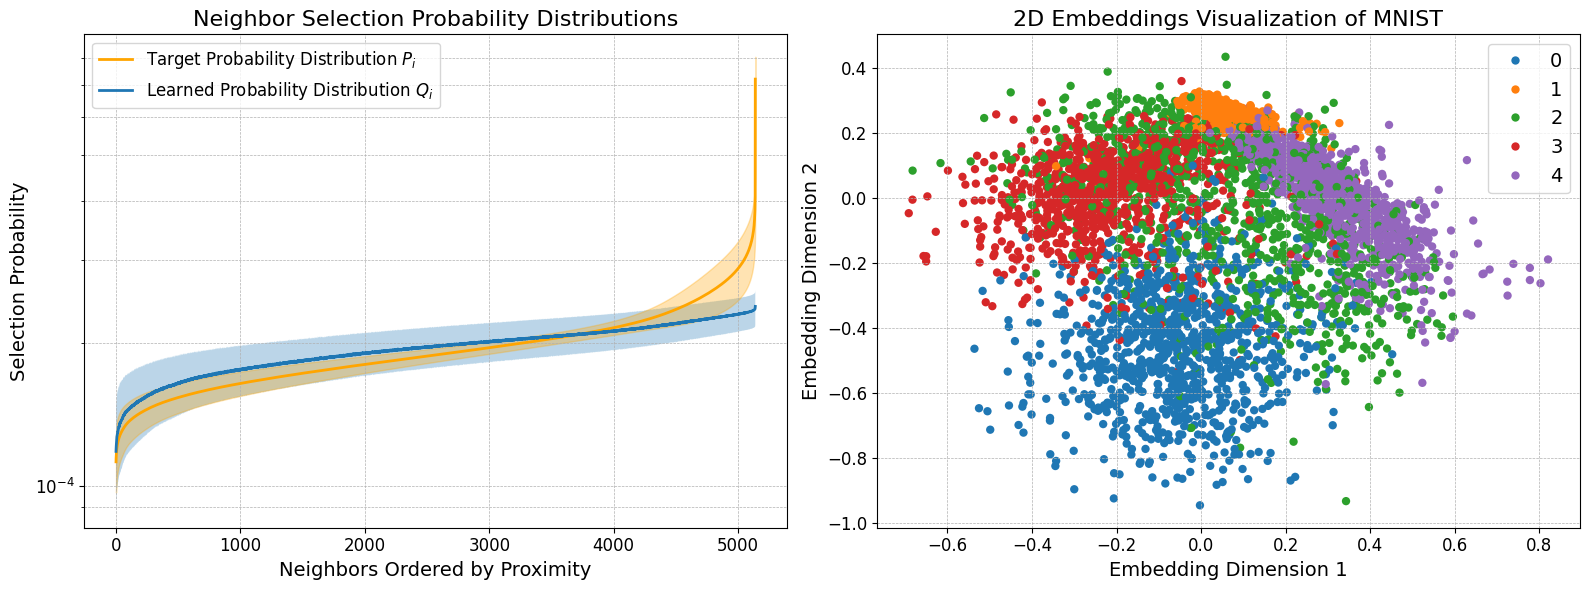

In [6]:
tSNE = KernelModel(
    mapper = MLPMapper(output_dim = 2),
    target_kernel = GaussianKernel(sigma = 5),
    learned_kernel = CauchyKernel(gamma = 1),
    plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=20, check_val_every_n_epoch=10, callbacks=[plot_callback] )
trainer.fit(tSNE, train_loader, test_loader)

# t-SNE with Uniform Affinities

Sanity Checking: 0it [00:00, ?it/s]

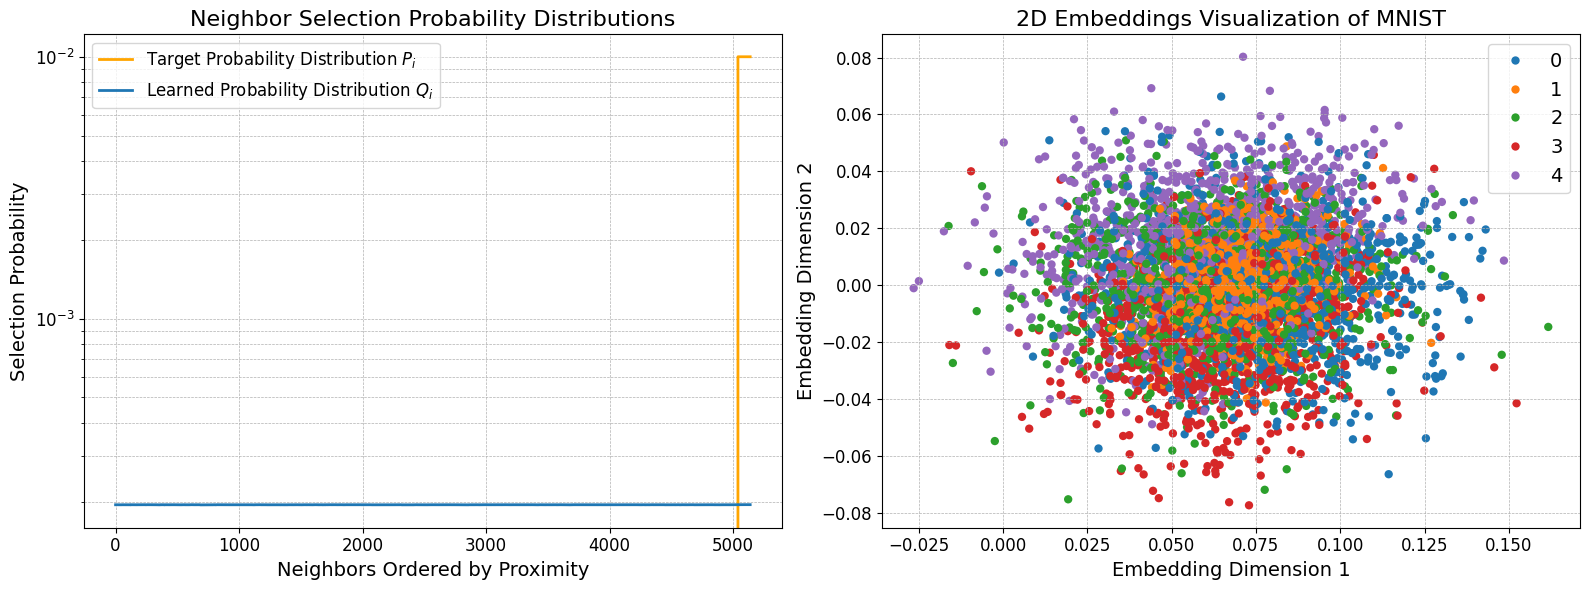

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

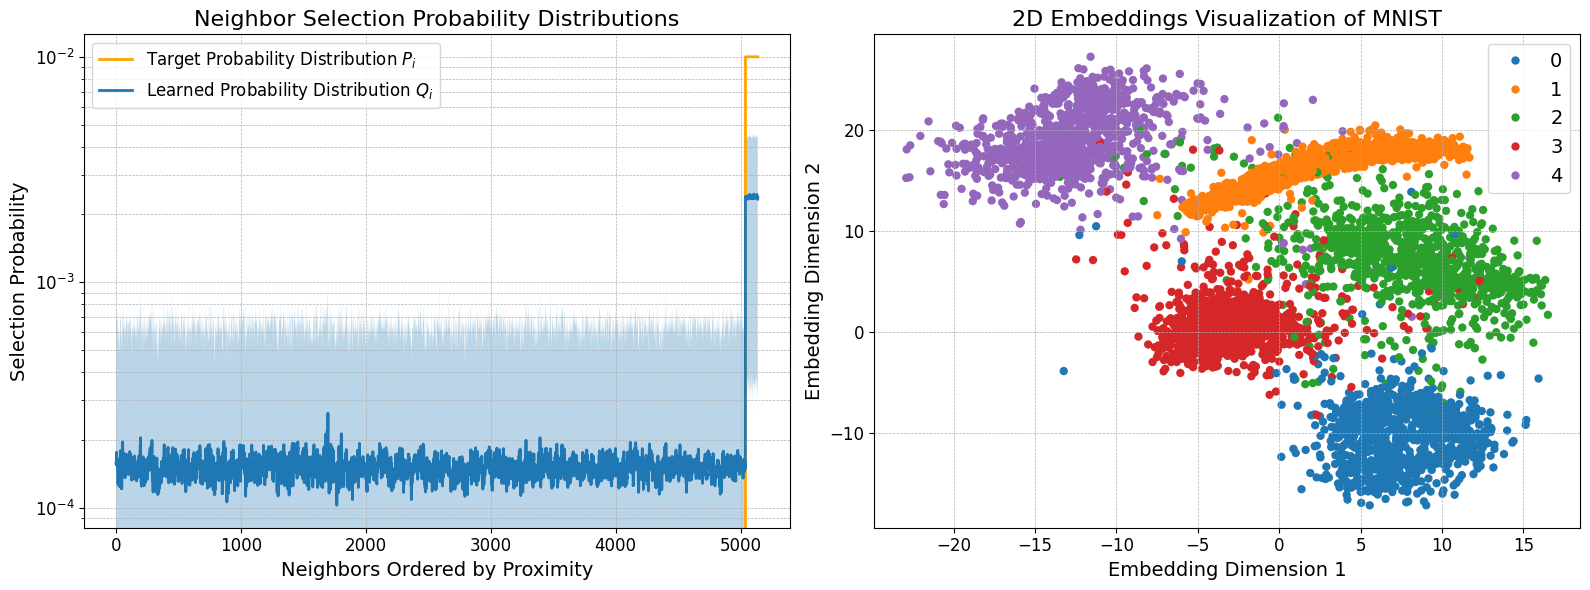

Validation: 0it [00:00, ?it/s]

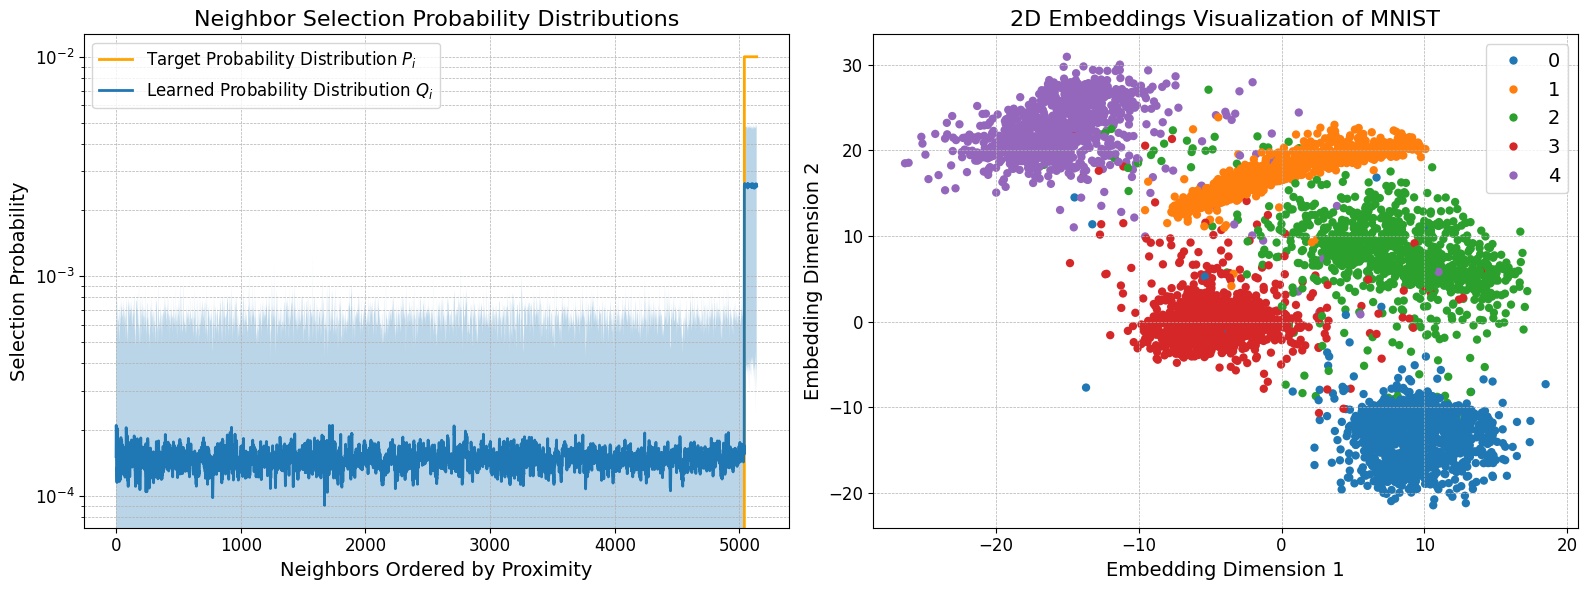

In [7]:
tSNE_uniform = KernelModel(
    mapper = MLPMapper(output_dim = 2),
    target_kernel = KnnKernel(k=100),
    learned_kernel = CauchyKernel(gamma=1),
    plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=20, gpus=1, check_val_every_n_epoch=10, callbacks=[plot_callback] )
trainer.fit(tSNE_uniform, train_loader, test_loader)

# t-SNE with Uniform Affinities and a Leak 

Sanity Checking: 0it [00:00, ?it/s]

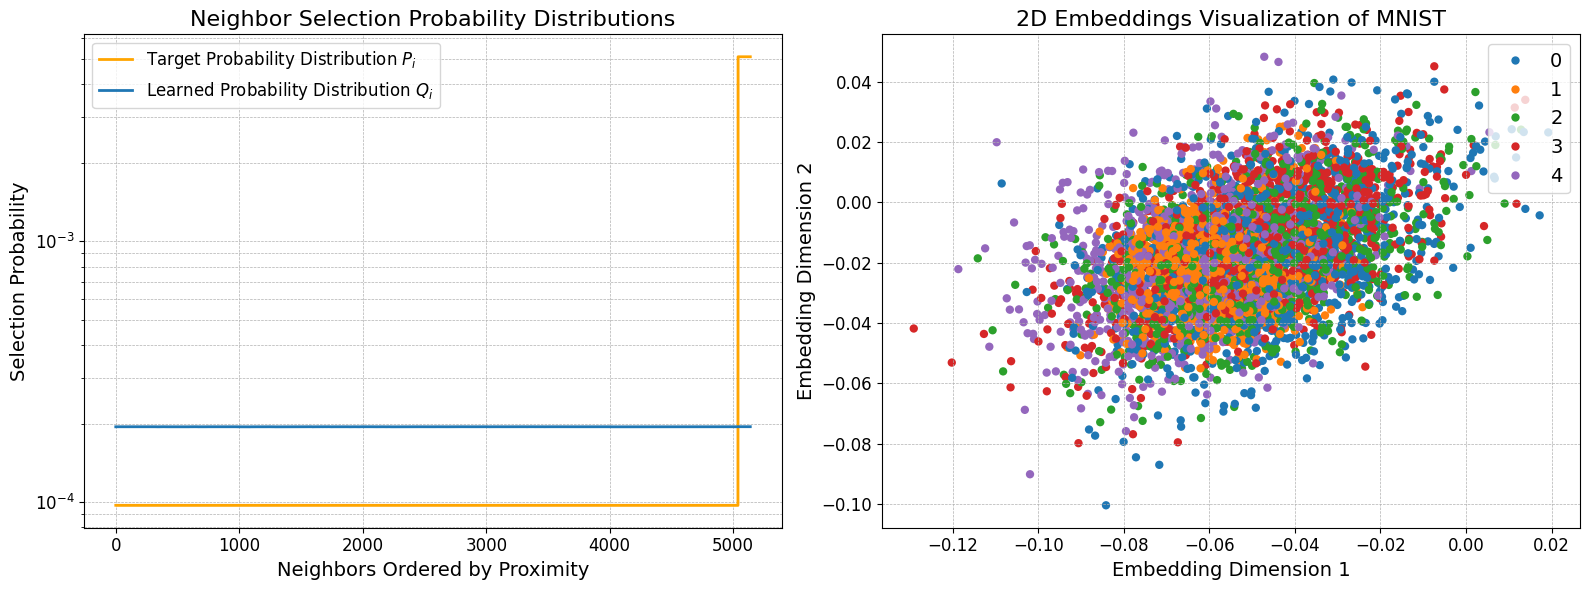

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

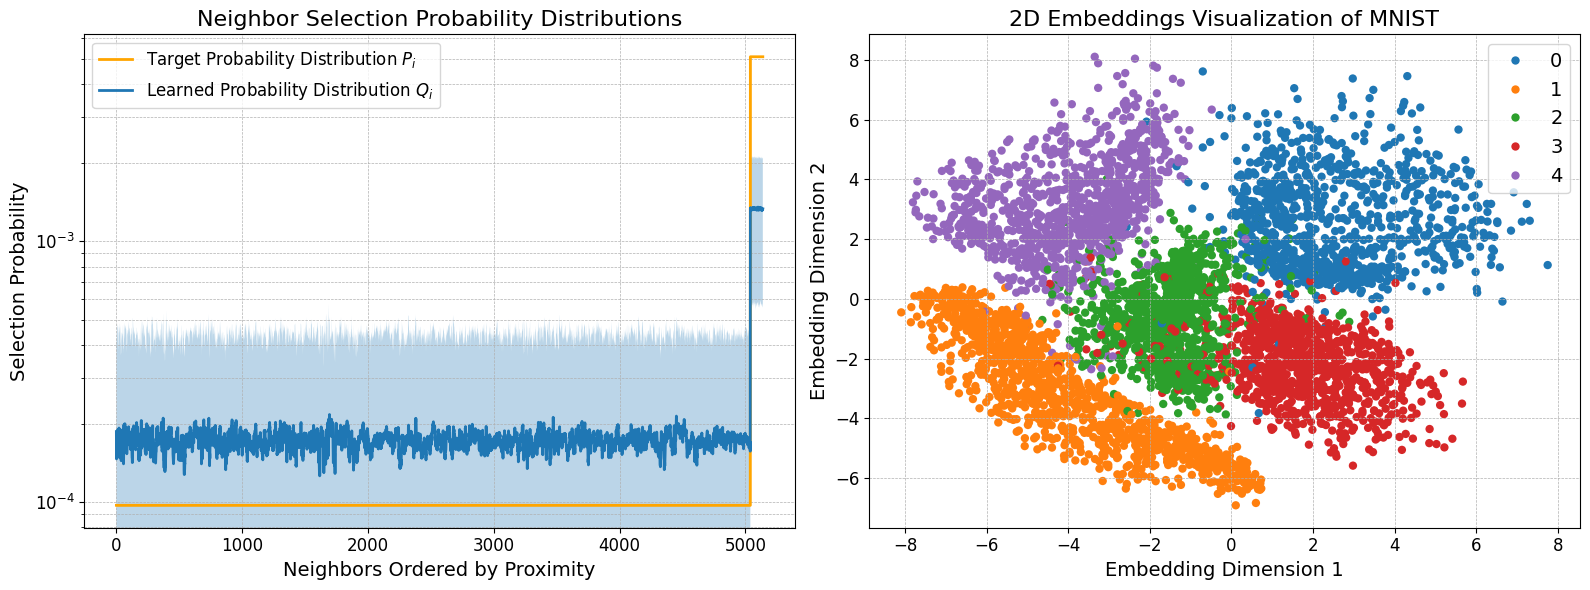

Validation: 0it [00:00, ?it/s]

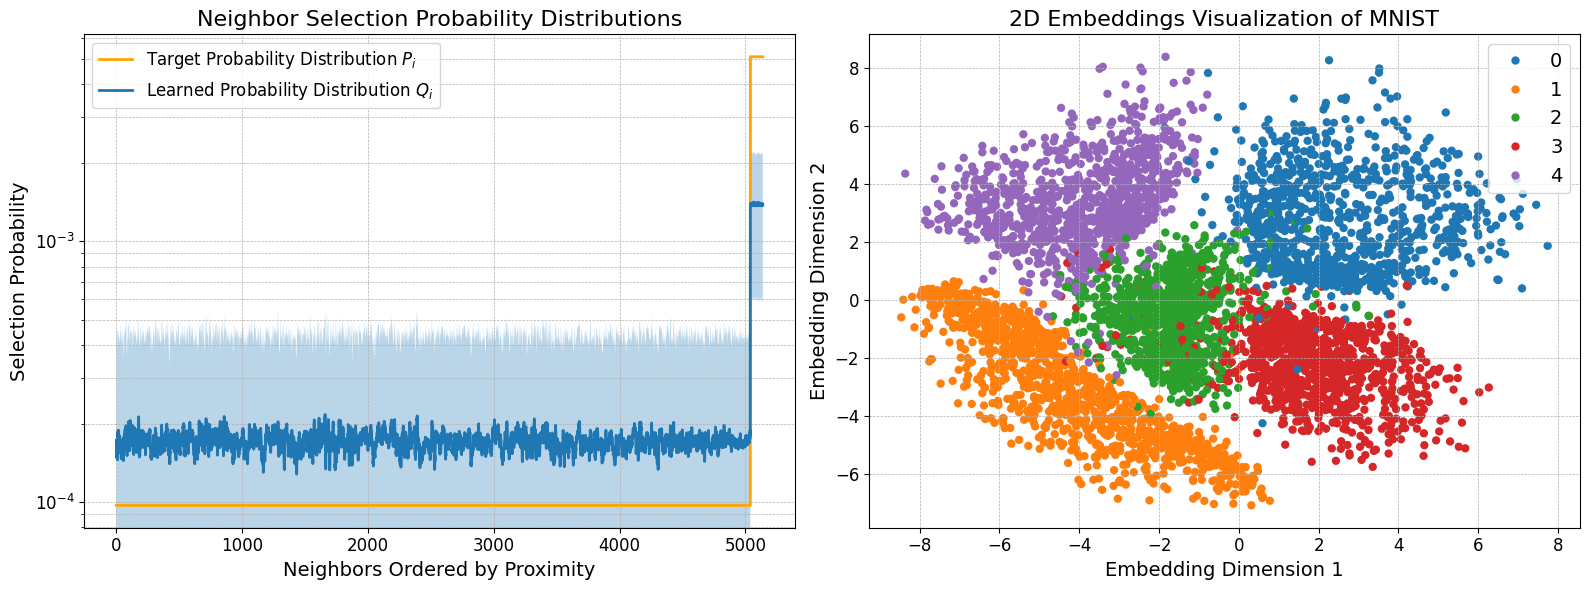

In [8]:
tSNE_uniform_w_leak = KernelModel(
    mapper = MLPMapper(output_dim = 2),
    target_kernel = KnnKernel(k=100).leak_kernel(0.5),
    learned_kernel = CauchyKernel(gamma=1),
    plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=20, gpus=1, check_val_every_n_epoch=10, callbacks=[plot_callback] )
trainer.fit(tSNE_uniform_w_leak, train_loader, test_loader)

# Supervised Contrastive Learning

Using the same mapper for both views


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

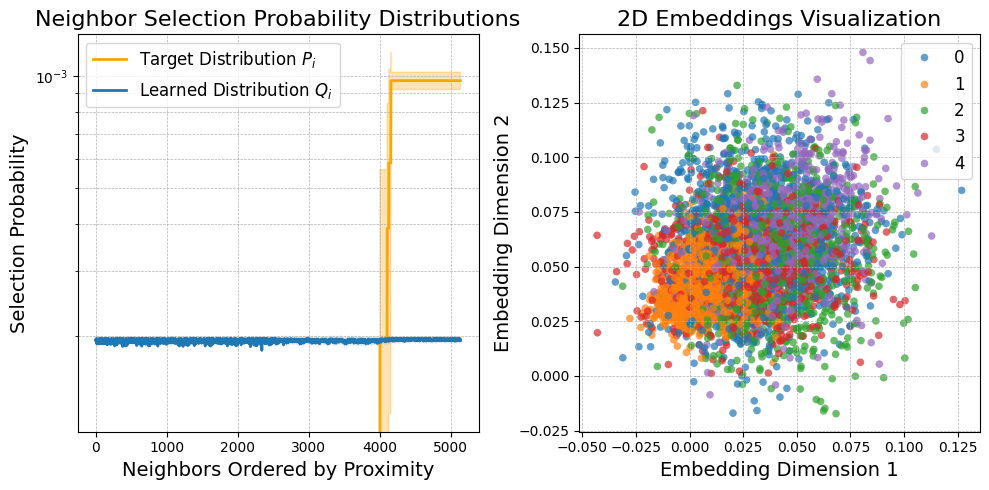

Training: |          | 0/? [00:00<?, ?it/s]

train_loss_epoch: 53.586742877960205
train_loss_epoch: 49.83471632003784
train_loss_epoch: 48.6066517829895
train_loss_epoch: 47.95532703399658
train_loss_epoch: 47.62192440032959
train_loss_epoch: 47.37762784957886
train_loss_epoch: 47.19553899765015
train_loss_epoch: 47.04149103164673
train_loss_epoch: 46.95317029953003


Validation: |          | 0/? [00:00<?, ?it/s]

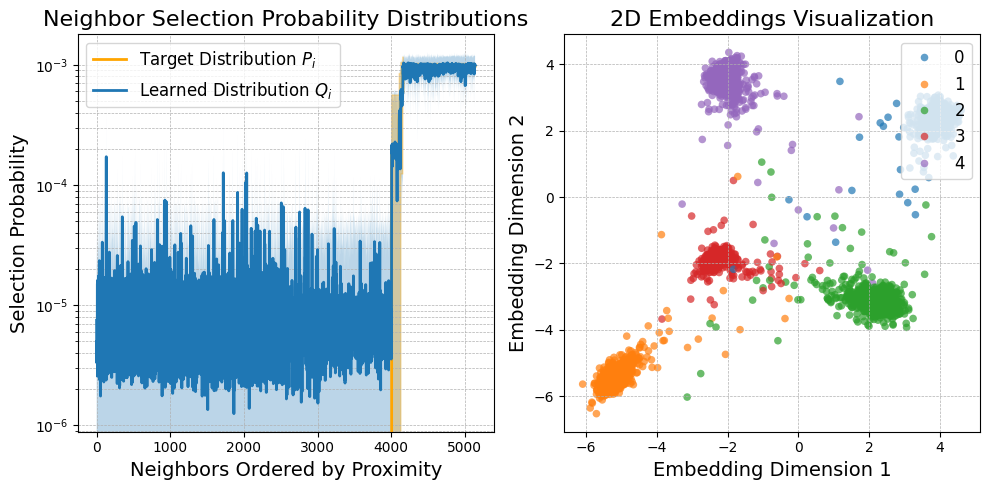

train_loss_epoch: 46.82193851470947
train_loss_epoch: 46.74091720581055
train_loss_epoch: 46.66939687728882
train_loss_epoch: 46.63341569900513
train_loss_epoch: 46.60803842544556
train_loss_epoch: 46.5760817527771
train_loss_epoch: 46.513704776763916
train_loss_epoch: 46.492310523986816
train_loss_epoch: 46.47816228866577
train_loss_epoch: 46.450862407684326


Validation: |          | 0/? [00:00<?, ?it/s]

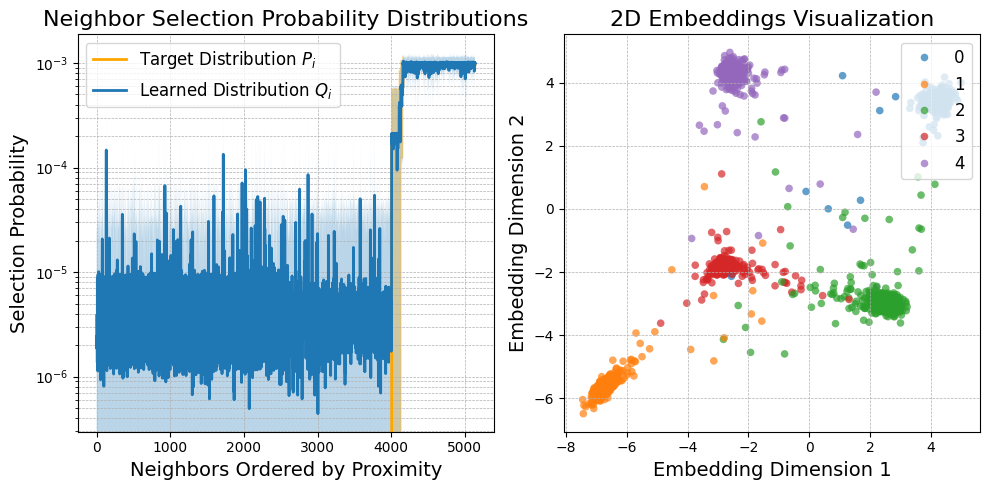

train_loss_epoch: 46.43092727661133
train_loss_epoch: 46.40084981918335
train_loss_epoch: 46.398075580596924
train_loss_epoch: 46.38013315200806
train_loss_epoch: 46.36867713928223
train_loss_epoch: 46.36203861236572
train_loss_epoch: 46.35700607299805
train_loss_epoch: 46.353989601135254
train_loss_epoch: 46.34623384475708
train_loss_epoch: 46.37112092971802


Validation: |          | 0/? [00:00<?, ?it/s]

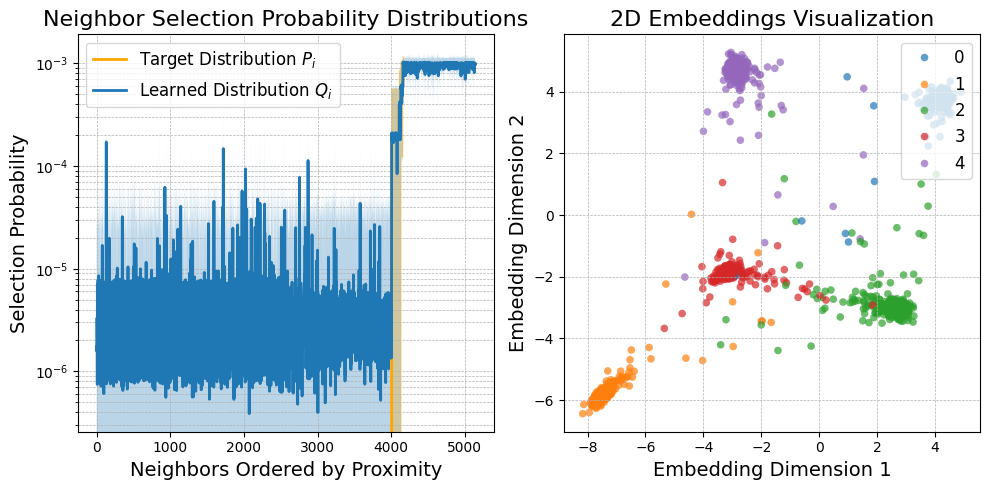

train_loss_epoch: 46.34045648574829
train_loss_epoch: 46.33132839202881
train_loss_epoch: 46.34370470046997
train_loss_epoch: 46.32607841491699
train_loss_epoch: 46.32540464401245
train_loss_epoch: 46.33696365356445
train_loss_epoch: 46.316650390625
train_loss_epoch: 46.31458854675293
train_loss_epoch: 46.320751667022705
train_loss_epoch: 46.30911159515381


Validation: |          | 0/? [00:00<?, ?it/s]

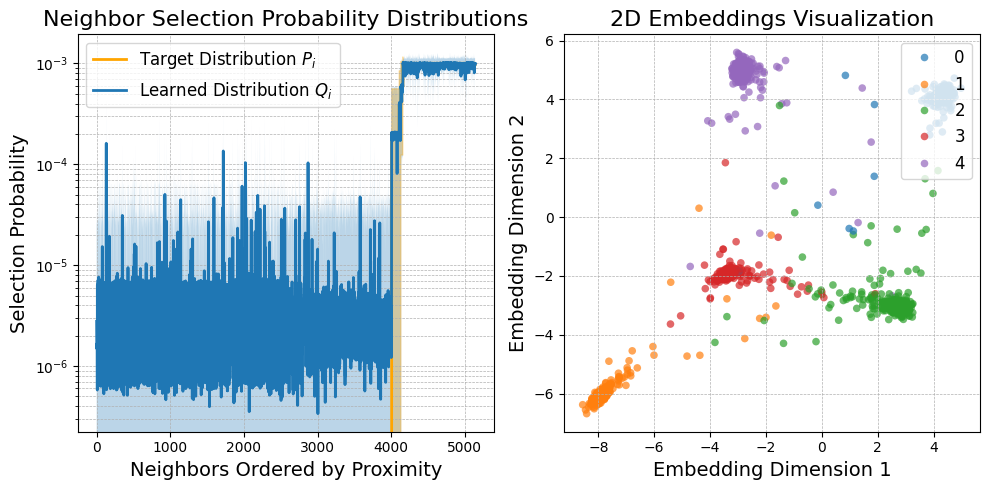

train_loss_epoch: 46.306471824645996
train_loss_epoch: 46.317138671875
train_loss_epoch: 46.30485248565674
train_loss_epoch: 46.308536529541016
train_loss_epoch: 46.319777965545654
train_loss_epoch: 46.32154941558838
train_loss_epoch: 46.30432319641113
train_loss_epoch: 46.298829555511475
train_loss_epoch: 46.29775857925415
train_loss_epoch: 46.30091953277588


Validation: |          | 0/? [00:00<?, ?it/s]

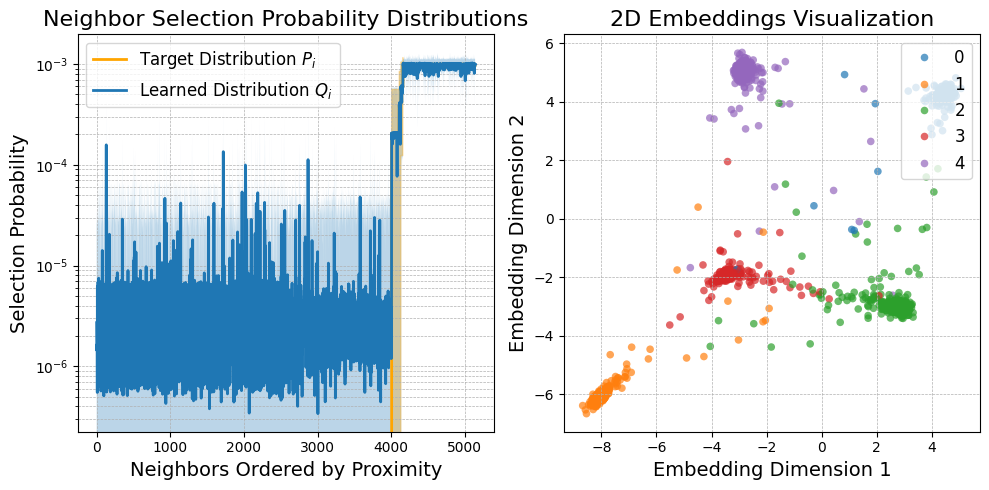

train_loss_epoch: 46.297075271606445


In [15]:
supcon_model = KernelModel(
    mapper = MLPMapper(output_dim = 2),
    target_kernel = LabelsKernel(),
    learned_kernel = GaussianKernel(sigma=1),
    #plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=50, check_val_every_n_epoch=10, callbacks=[plot_callback] )
trainer.fit(supcon_model, train_loader, test_loader)

In [4]:
from plot_callback_v2 import PlotLogger, PlotConfig 

# Example using Plotly version:
plot_config = PlotConfig(
    show_plots=True, # Or False to log to TensorBoard
    selected_plots=['embeddings', 'probabilities_star'] # <-- Add it here
)

plot_callback = PlotLogger(config=plot_config)

supcon_model_3d = KernelModel(
    # --- Modify MLPMapper ---
    mapper = MLPMapper(
        # input_dim=... (make sure this matches flattened MNIST: 28*28=784)
        hidden_dims=(512, 512, 2000), # Or your desired hidden layers
        output_dim = 3,              # <-- Set to 3 dimensions
        normalize = True             # <-- Normalize output to unit sphere
    ),
    # --- Keep other kernels ---
    target_kernel = LabelsKernel(), 
    learned_kernel = GaussianKernel(sigma=1),
    # --- Add other necessary KernelModel args ---
    # e.g., num_classes=10, accuracy_mode='regular', lr=1e-3, ...
)

trainer = pl.Trainer(max_epochs=50, check_val_every_n_epoch=10, callbacks=[plot_callback] )
trainer.fit(supcon_model_3d, train_loader, test_loader)

Using the same mapper for both views



Sanity Checking: |          | 0/? [00:00<?, ?it/s]

AttributeError: 'Tensor' object has no attribute 'keys'

# Clustering (KMeans w Entropy Panelty)

Sanity Checking: 0it [00:00, ?it/s]

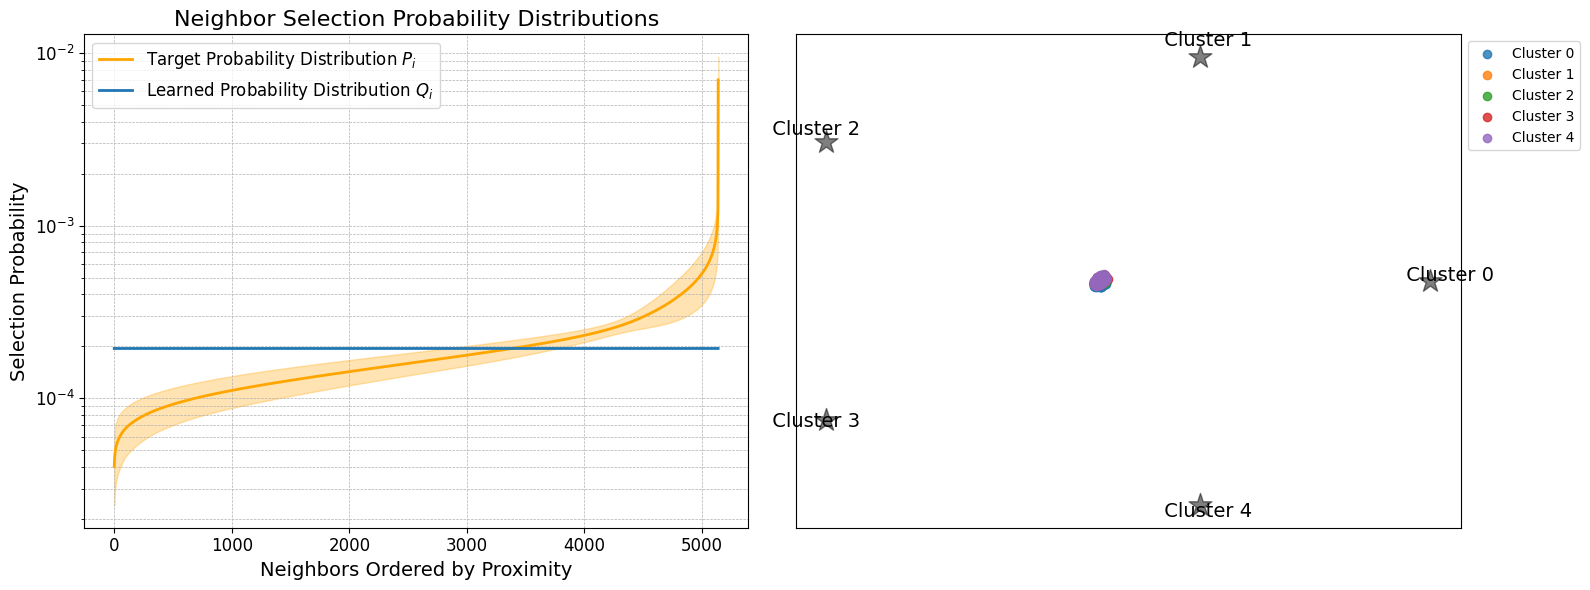

val_accuracy 28.235065937042236


Training: 0it [00:00, ?it/s]

train_accuracy 38.384103775024414
train_accuracy 58.82468223571777


Validation: 0it [00:00, ?it/s]

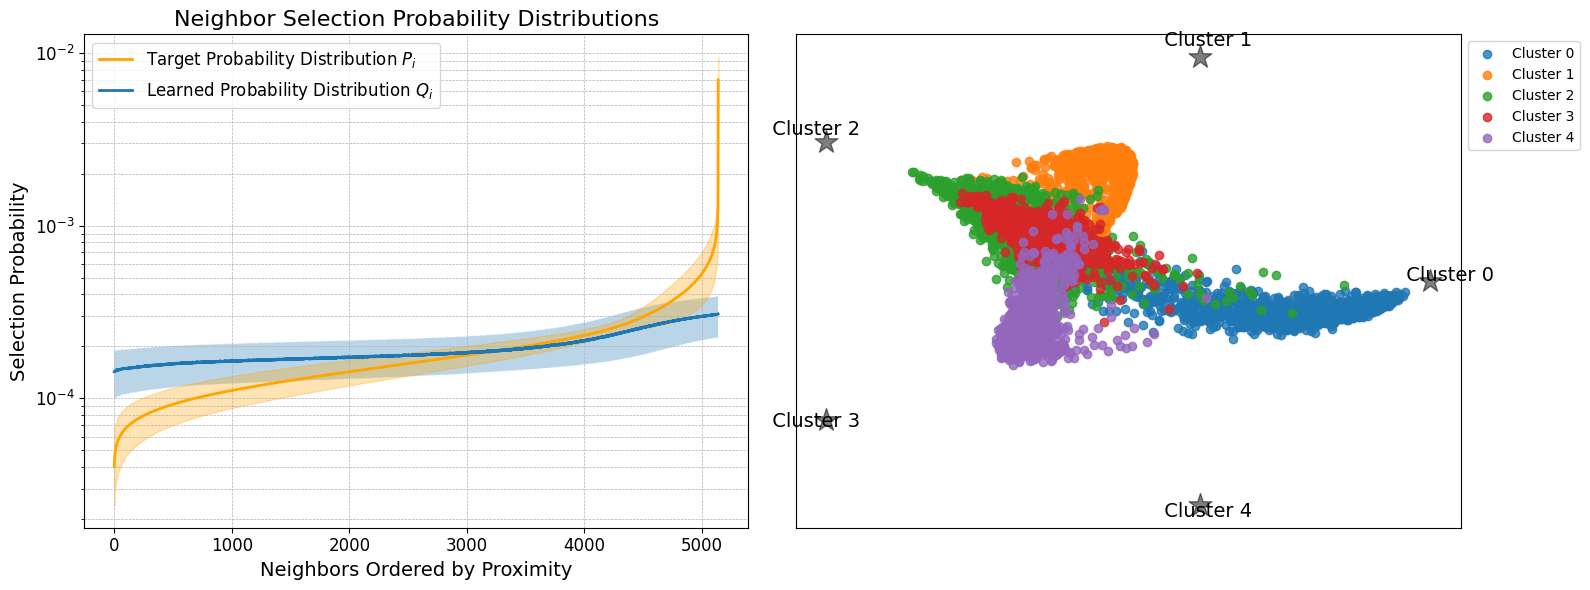

val_accuracy 73.24382066726685
train_accuracy 65.89750051498413
train_accuracy 74.66989159584045
train_accuracy 74.35285449028015


Validation: 0it [00:00, ?it/s]

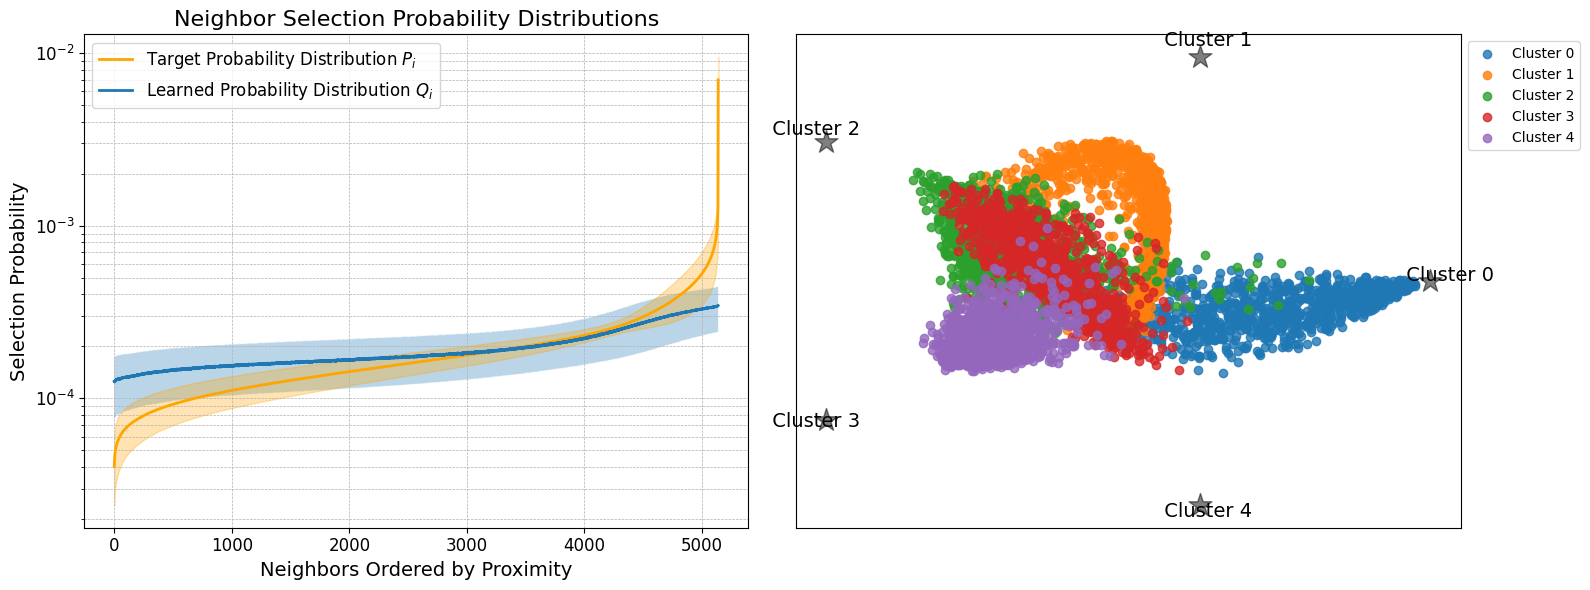

val_accuracy 71.94006443023682
train_accuracy 74.76140856742859


In [9]:
kmeans_model = KernelModel(
    mapper = MLPMapper(output_dim = 5, softmax = True),
    target_kernel = GaussianKernel(sigma=3),
    learned_kernel = ClusteringKernel(),
    accuracy_mode = 'unsupervised',
    num_classes = 5,
    plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=20, gpus=1, check_val_every_n_epoch=3, callbacks=[plot_callback] )
trainer.fit(kmeans_model, train_loader, test_loader)

# Clustering with KNN Kernel(TEMI)

Sanity Checking: 0it [00:00, ?it/s]

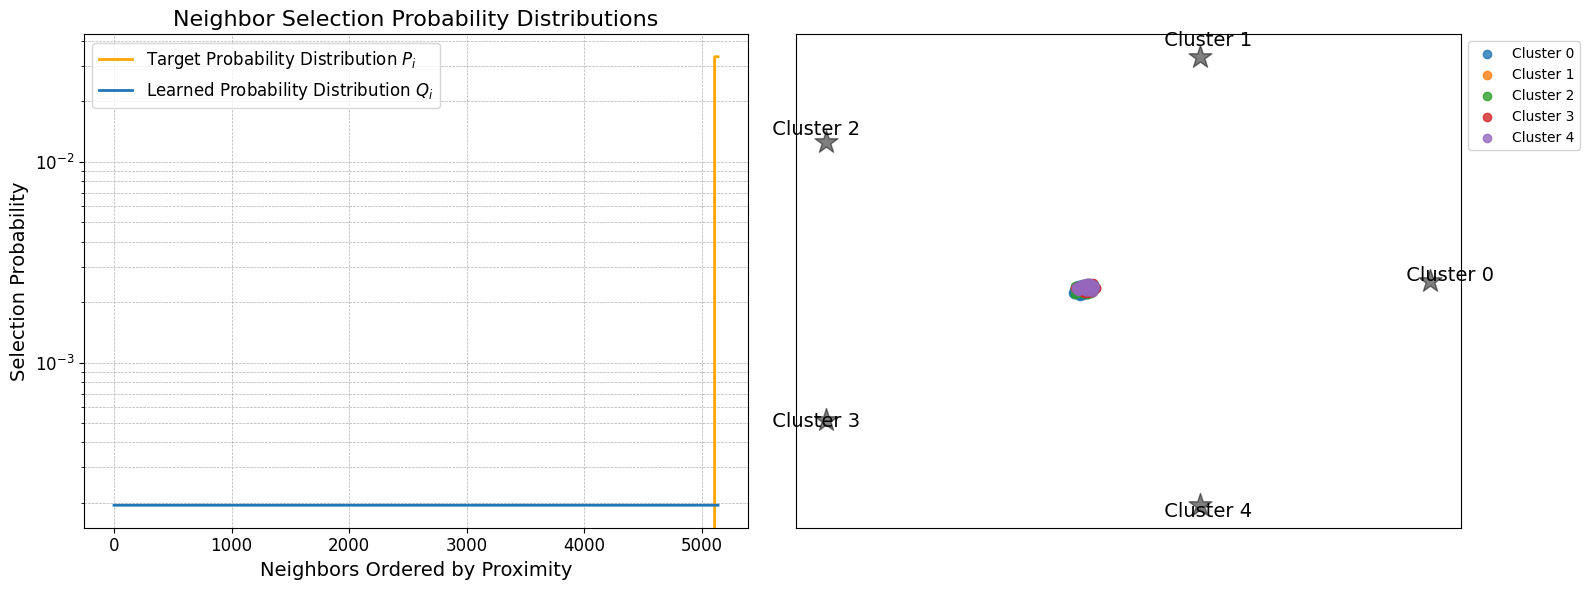

val_accuracy 22.0860093832016


Training: 0it [00:00, ?it/s]

train_accuracy 39.681658148765564
train_accuracy 63.78284692764282


Validation: 0it [00:00, ?it/s]

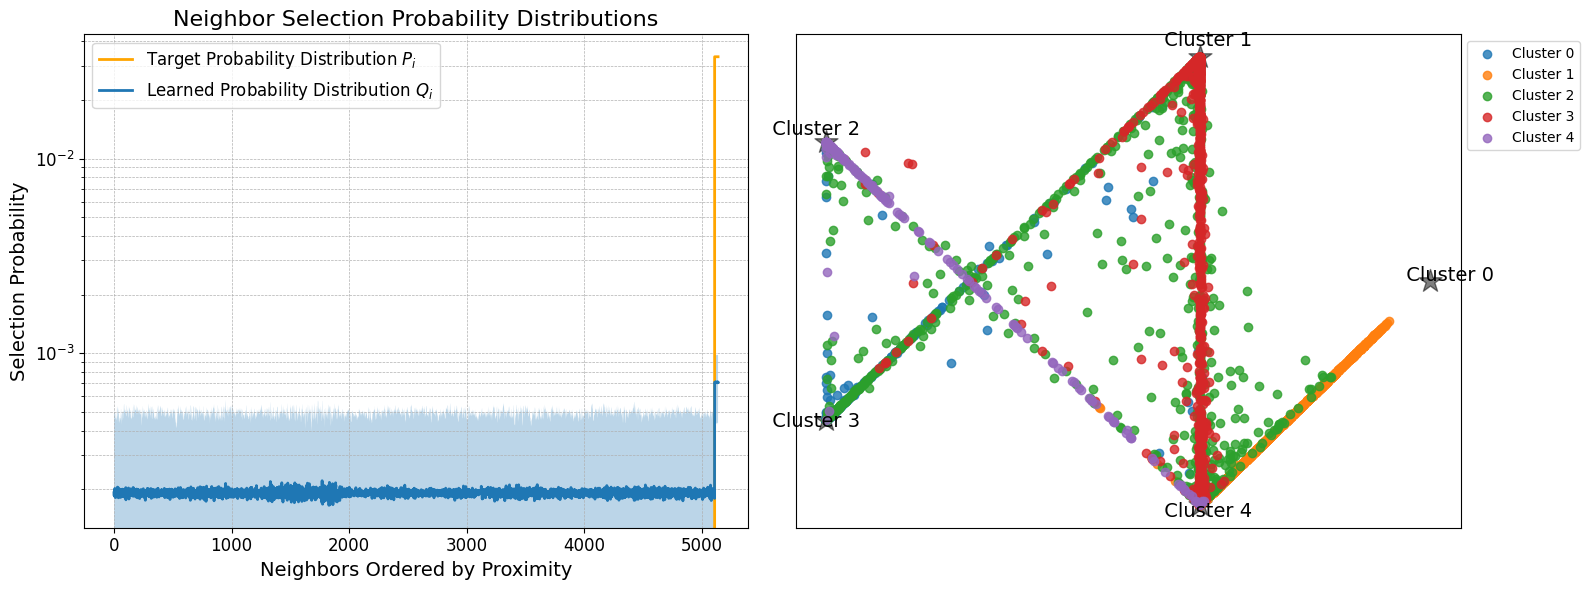

val_accuracy 66.82233810424805
train_accuracy 72.95398116111755
train_accuracy 71.02235555648804
train_accuracy 68.3586061000824


Validation: 0it [00:00, ?it/s]

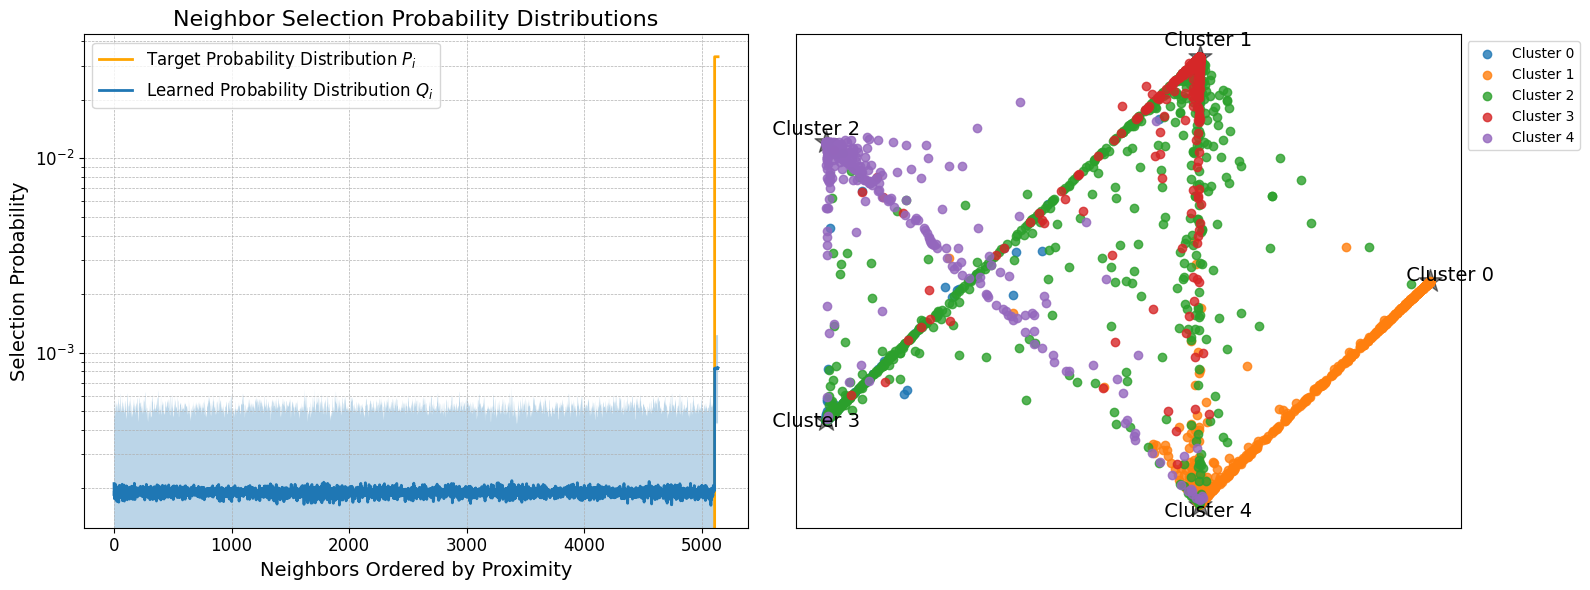

val_accuracy 68.1844711303711
train_accuracy 68.46320033073425
train_accuracy 69.18224692344666
train_accuracy 69.00575160980225


Validation: 0it [00:00, ?it/s]

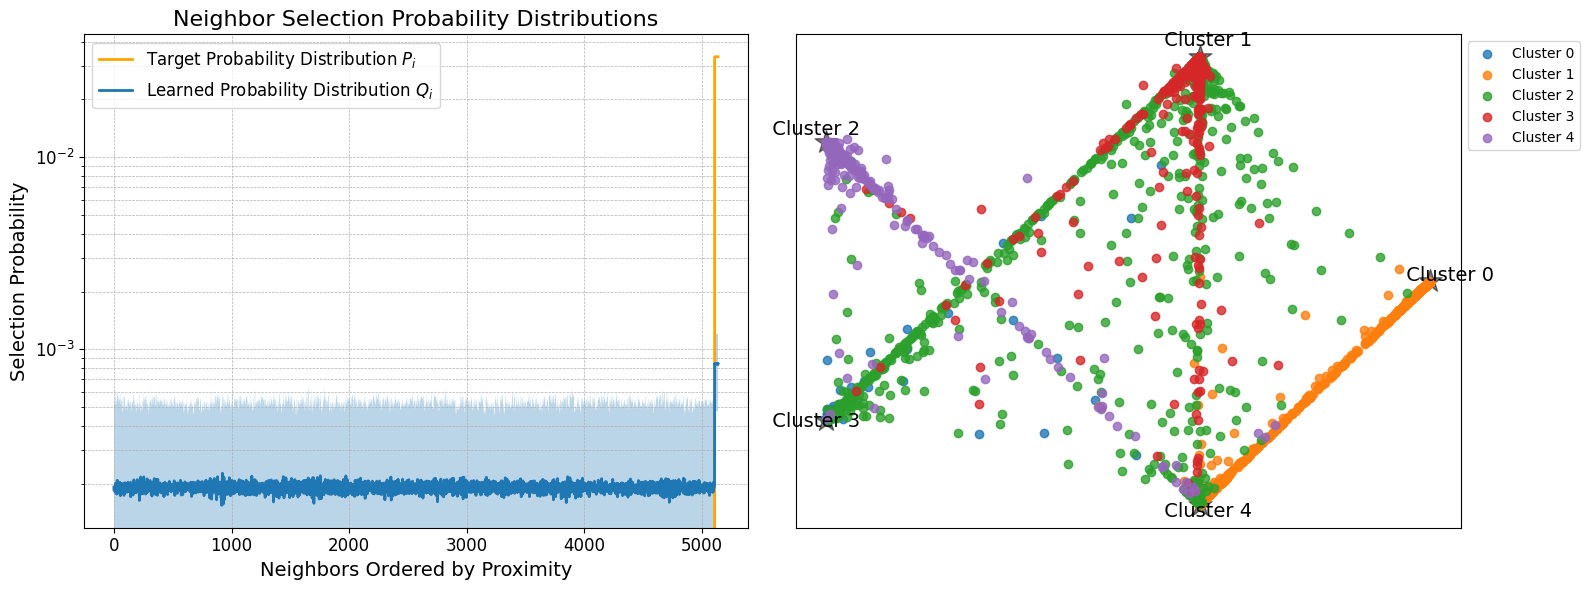

val_accuracy 68.8071608543396
train_accuracy 69.6528971195221
train_accuracy 70.0091540813446
train_accuracy 70.02876400947571


Validation: 0it [00:00, ?it/s]

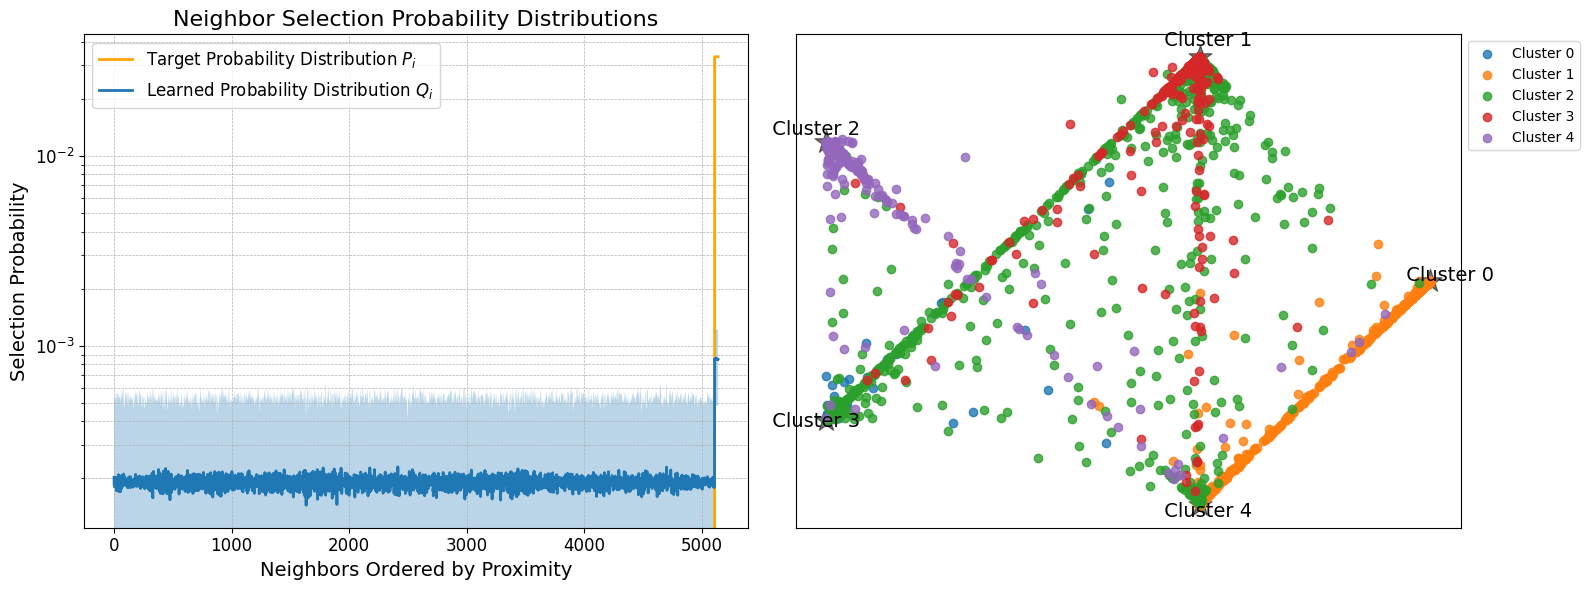

val_accuracy 69.25472021102905
train_accuracy 70.3490674495697
train_accuracy 70.30657529830933
train_accuracy 70.61380743980408


Validation: 0it [00:00, ?it/s]

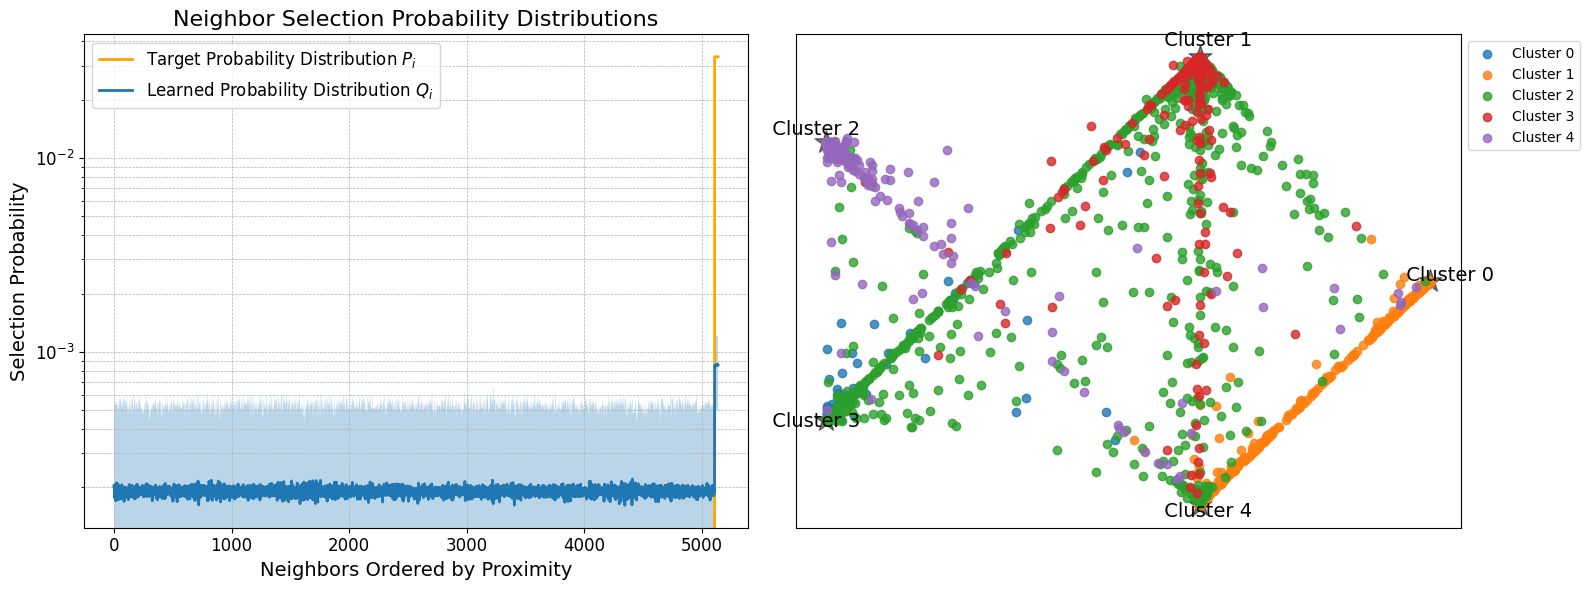

val_accuracy 70.22767066955566
train_accuracy 70.73473930358887


In [15]:
temi_model = KernelModel(
    mapper = MLPMapper(output_dim = 5, softmax = True),
    target_kernel = KnnKernel(k=30),
    learned_kernel = ClusteringKernel(),
    accuracy_mode = 'unsupervised',
    num_classes = 5,
    plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=15, gpus=1, check_val_every_n_epoch=3, callbacks=[plot_callback] )
trainer.fit(temi_model, train_loader, test_loader)

# Clustering with KNN Kernel and Leak

Sanity Checking: 0it [00:00, ?it/s]

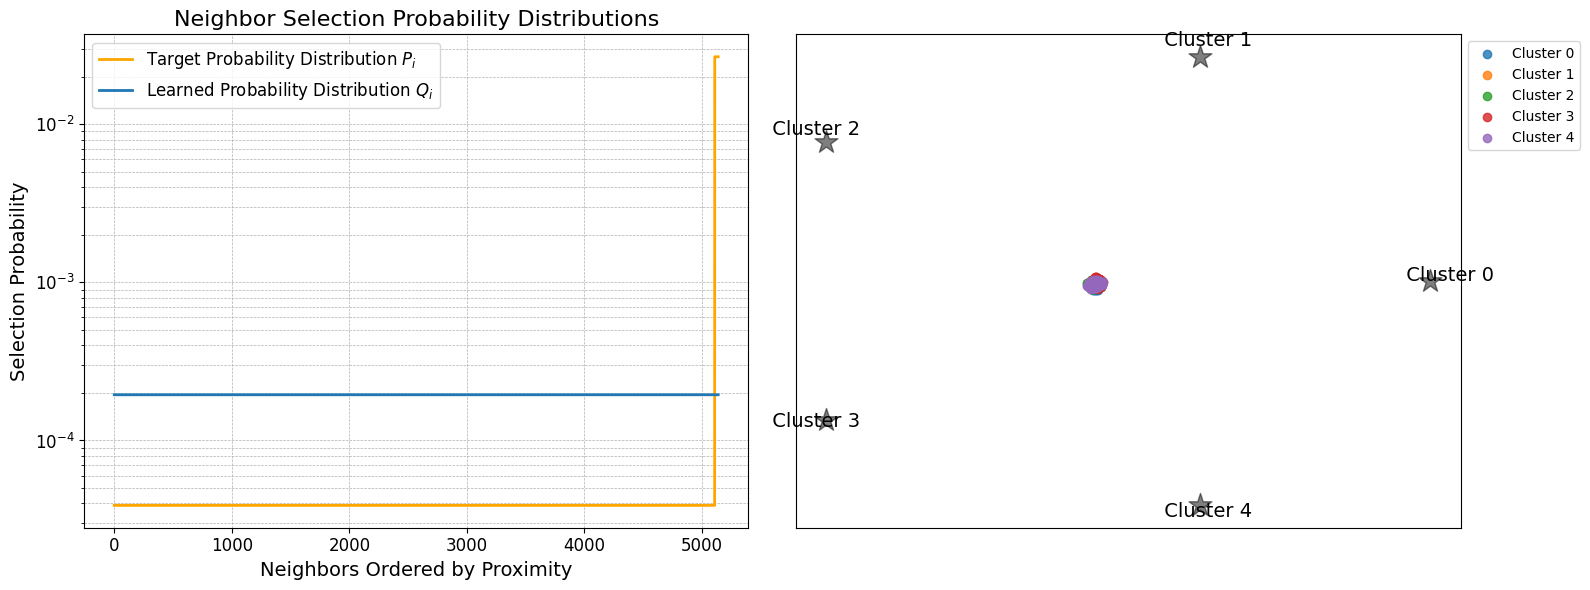

val_accuracy 24.03191328048706


Training: 0it [00:00, ?it/s]

train_accuracy 47.718656063079834
train_accuracy 69.46659684181213


Validation: 0it [00:00, ?it/s]

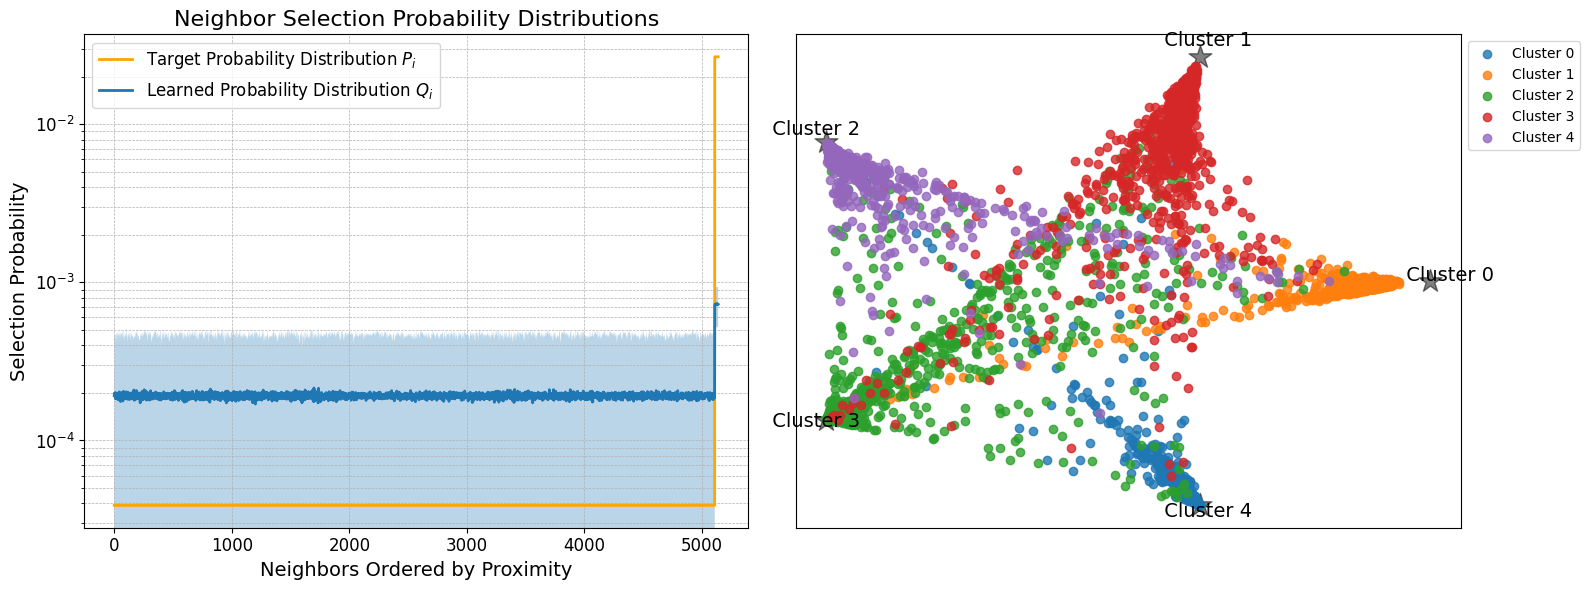

val_accuracy 91.690993309021
train_accuracy 86.67799830436707
train_accuracy 91.9597327709198
train_accuracy 94.02863383293152


Validation: 0it [00:00, ?it/s]

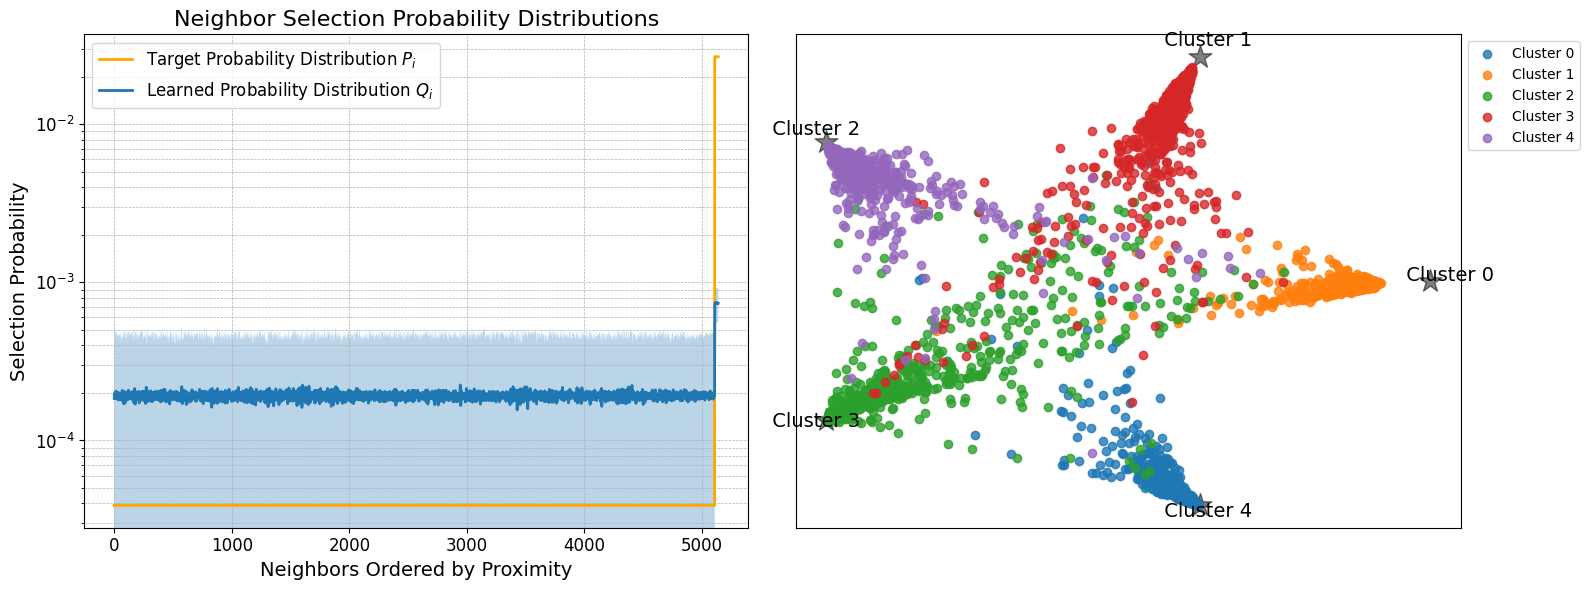

val_accuracy 96.41953706741333
train_accuracy 95.17911076545715
train_accuracy 95.49287557601929
train_accuracy 95.83605527877808


Validation: 0it [00:00, ?it/s]

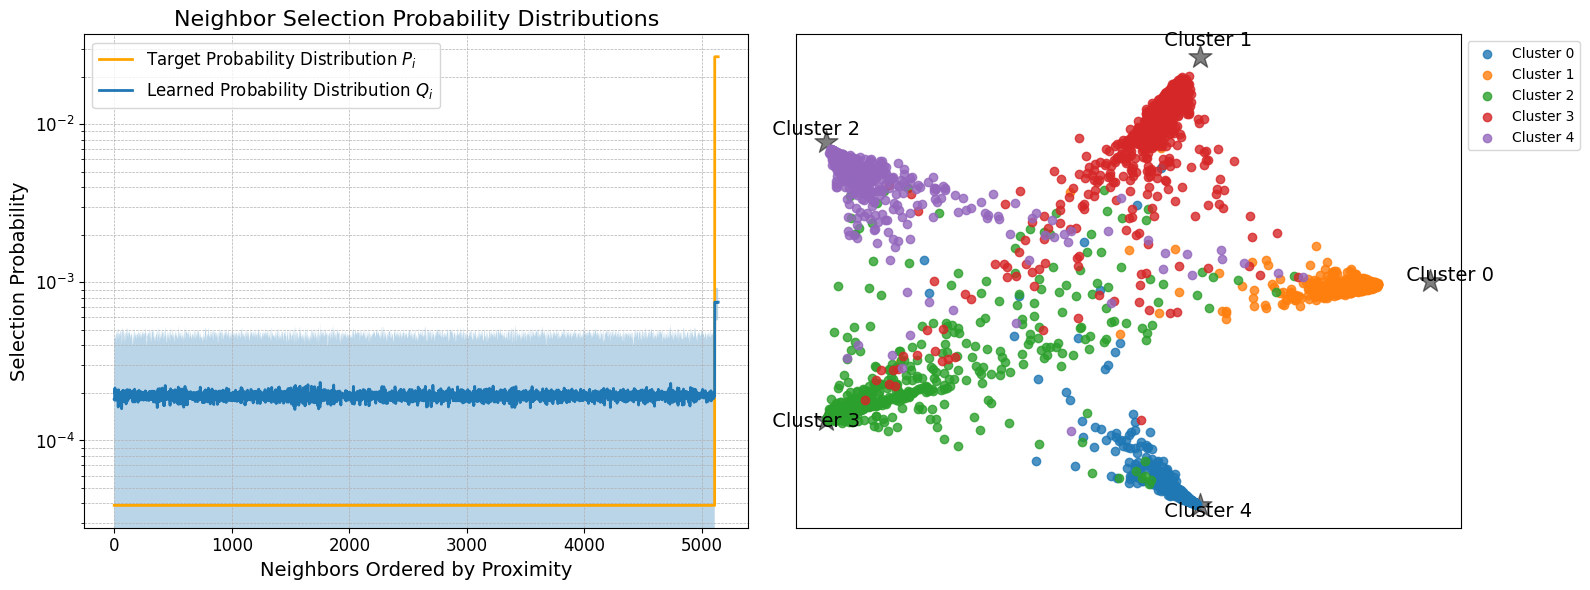

val_accuracy 97.061687707901
train_accuracy 96.14328742027283
train_accuracy 96.270751953125
train_accuracy 96.42437100410461


Validation: 0it [00:00, ?it/s]

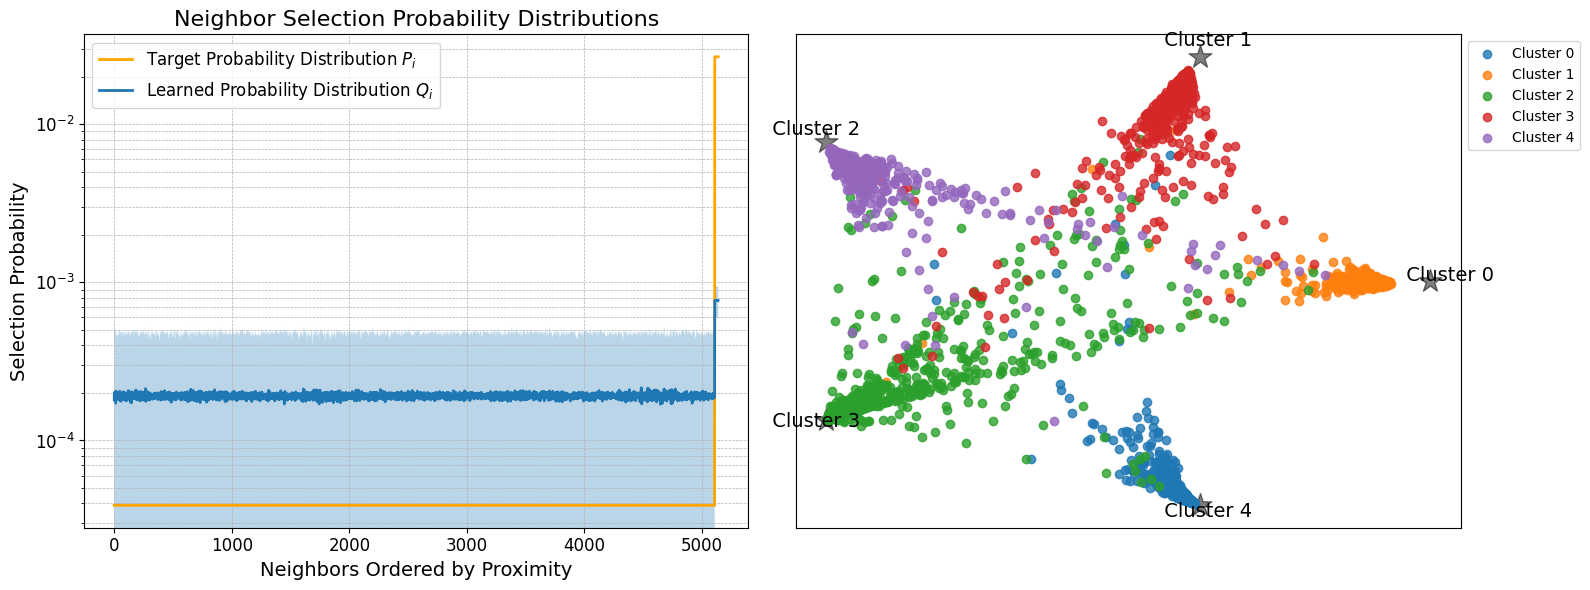

val_accuracy 97.17844128608704
train_accuracy 96.53222560882568
train_accuracy 96.591055393219
train_accuracy 96.64335250854492


Validation: 0it [00:00, ?it/s]

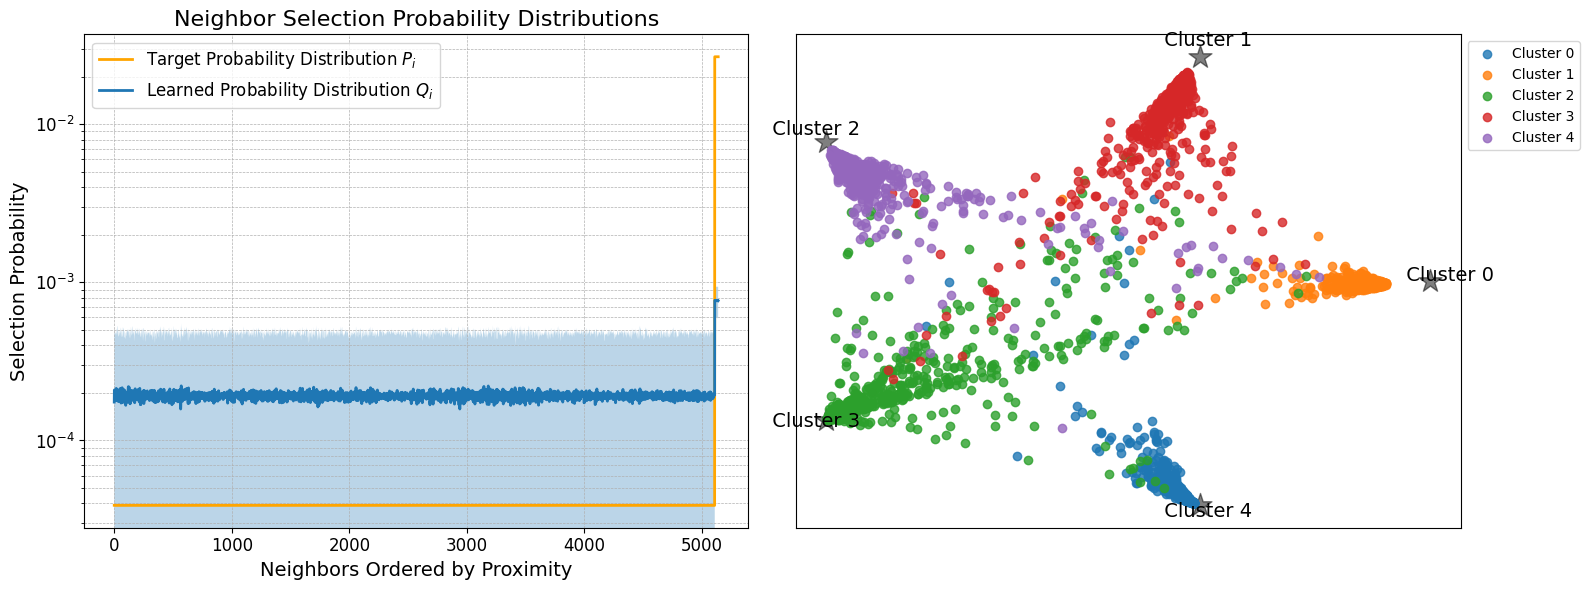

val_accuracy 97.39248752593994
train_accuracy 96.70218229293823


In [13]:
clustering_model = KernelModel(
    mapper = MLPMapper(output_dim = 5, softmax = True),
    target_kernel = KnnKernel(k=30).leak_kernel(0.2),
    learned_kernel = ClusteringKernel(),
    accuracy_mode = 'unsupervised',
    num_classes = 5,
    plot_embeddings = True,
)

trainer = pl.Trainer(max_epochs=15, gpus=1, check_val_every_n_epoch=3, callbacks=[plot_callback] )
trainer.fit(clustering_model, train_loader, test_loader)